### 問題1
下記データをone-hot-encodeingしてください．

In [16]:
import pandas as pd

data = {
    '性別': ['男性', '女性', '女性', '男性', '女性', '女性', '男性', '男性', '女性', '男性'],
    '体重': [70, 55, 60, 80, 65, 50, 90, 85, 45, 75],
    '身長': [180, 165, 170, 190, 175, 160, 185, 178, 158, 182]
}
df = pd.DataFrame(data)
print(df)

   性別  体重   身長
0  男性  70  180
1  女性  55  165
2  女性  60  170
3  男性  80  190
4  女性  65  175
5  女性  50  160
6  男性  90  185
7  男性  85  178
8  女性  45  158
9  男性  75  182


In [17]:
df_one_hot = pd.get_dummies(df, columns=['性別'])
print(df_one_hot)

   体重   身長  性別_女性  性別_男性
0  70  180      0      1
1  55  165      1      0
2  60  170      1      0
3  80  190      0      1
4  65  175      1      0
5  50  160      1      0
6  90  185      0      1
7  85  178      0      1
8  45  158      1      0
9  75  182      0      1


In [6]:
df_one_hot = pd.get_dummies(df)
print(df_one_hot)

   体重   身長  性別_女性  性別_男性
0  70  180      0      1
1  55  165      1      0
2  60  170      1      0
3  80  190      0      1
4  65  175      1      0
5  50  160      1      0
6  90  185      0      1
7  85  178      0      1
8  45  158      1      0
9  75  182      0      1


In [19]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='onehot-dense')

data_array = df_one_hot[['体重', '身長']].values

# KBinsDiscretizerをfitし、ビニング適用
kb.fit(data_array)
data_binned = kb.transform(data_array)

# 結果をDataFrameに変換して表示
bin_columns = [f'体重_bin{i+1}' for i in range(3)] + [f'身長_bin{i+1}' for i in range(3)]
df_binned = pd.DataFrame(data_binned, columns=bin_columns)
print(df_binned)

df_one_hot_binnend = pd.concat([df_one_hot, df_binned], axis=1)
print(df_one_hot_binnend)

   体重_bin1  体重_bin2  体重_bin3  身長_bin1  身長_bin2  身長_bin3
0      0.0      1.0      0.0      0.0      0.0      1.0
1      1.0      0.0      0.0      1.0      0.0      0.0
2      0.0      1.0      0.0      0.0      1.0      0.0
3      0.0      0.0      1.0      0.0      0.0      1.0
4      0.0      1.0      0.0      0.0      1.0      0.0
5      1.0      0.0      0.0      1.0      0.0      0.0
6      0.0      0.0      1.0      0.0      0.0      1.0
7      0.0      0.0      1.0      0.0      1.0      0.0
8      1.0      0.0      0.0      1.0      0.0      0.0
9      0.0      0.0      1.0      0.0      0.0      1.0
   体重   身長  性別_女性  性別_男性  体重_bin1  体重_bin2  体重_bin3  身長_bin1  身長_bin2  身長_bin3
0  70  180      0      1      0.0      1.0      0.0      0.0      0.0      1.0
1  55  165      1      0      1.0      0.0      0.0      1.0      0.0      0.0
2  60  170      1      0      0.0      1.0      0.0      0.0      1.0      0.0
3  80  190      0      1      0.0      0.0      1.0      0.0      0.

Text(0, 0.5, 'Frequency')

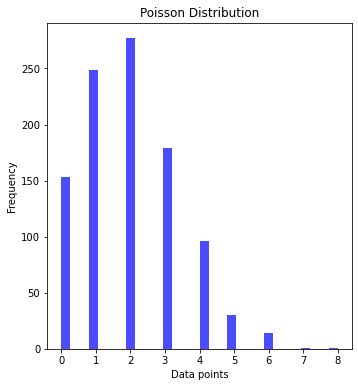

In [22]:
import numpy as np
import matplotlib.pyplot as plt

lambda_ = 2
poisson_data = np.random.poisson(lam=lambda_, size=1000)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(poisson_data, bins=30, alpha=0.7, color='blue')
plt.title("Poisson Distribution")
plt.xlabel("Data points")
plt.ylabel("Frequency")

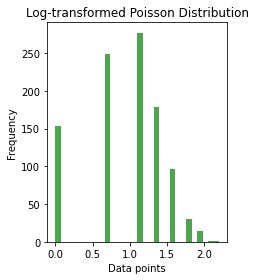

In [23]:
log_poisson_data = np.log(poisson_data + 1)

plt.subplot(1, 2, 2)
plt.hist(log_poisson_data, bins=30, alpha=0.7, color='green')
plt.title("Log-transformed Poisson Distribution")
plt.xlabel("Data points")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()